In [340]:
os.getcwd()
os.chdir("C:\\Users\\sinem\\Desktop\\kodluyoruz")

import pandas as pd

import seaborn as sns

import os

import numpy as np

import matplotlib.pyplot as plt


In [391]:

class Information():

    def __init__(self, df):
        self.df = df

    def Describer(self):
        print(df.describe())
        
    def LookHead(self):
        print(df.head(6))
     
    def preprocess(self):
        missing_values = ["n/a", "na", "--", "nan"]
        df = pd.read_csv("data.csv", na_values = missing_values)
        df['bad'] = df.bad.astype('category')
        df.dropna(inplace=True)
        print (df.isnull().sum())
        print(df.info())        
     
df = pd.read_csv('data.csv')
df['bad'] = df.bad.astype('category')

a = Information(df)
a.LookHead()
a.Describer()
a.preprocess()
        



    

  bad   loan   mortdue     value   reason  job   yoj  derog  delinq   clage  \
0   0  81200   18834.0  108355.0  HomeImp  NaN  28.0    0.0     0.0  139.14   
1   0  12600  103960.0  127384.0  DebtCon  NaN   2.0    0.0     0.0  129.02   
2   0  18000   46865.0   61266.0  DebtCon  NaN   5.0    0.0     0.0  102.59   
3   0  10300   57676.0   71027.0  DebtCon  NaN  19.0    0.0     0.0  157.52   
4   0   9400   56508.0   78358.0  DebtCon  NaN  17.0    0.0     0.0  141.93   
5   0  17200   39316.0   66978.0  DebtCon  NaN   4.0    0.0     0.0   99.99   

   ninq  clno  debtinc  
0   0.0  14.0   34.042  
1   0.0  25.0   34.479  
2   2.0   9.0   26.354  
3   1.0  11.0   33.992  
4   0.0  11.0   32.327  
5   1.0  10.0   26.437  
               loan        mortdue          value          yoj        derog  \
count   3576.000000    3262.000000    3512.000000  3264.000000  3149.000000   
mean   18529.697987   74013.907992  101076.922759     8.832644     0.261670   
std    11262.834060   44016.833772

In [361]:
import seaborn as sns 
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt 

class Visualization:

    def __init__(self, df):

        self.df = df


    def BoxPlot(self):
        import seaborn as sns
        import matplotlib.pyplot as plt
        df.boxplot()
      

df = pd.read_csv('data.csv') 
b=Visualization(df)


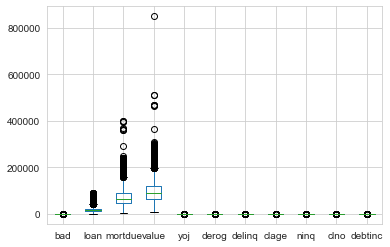

In [362]:
b.BoxPlot()

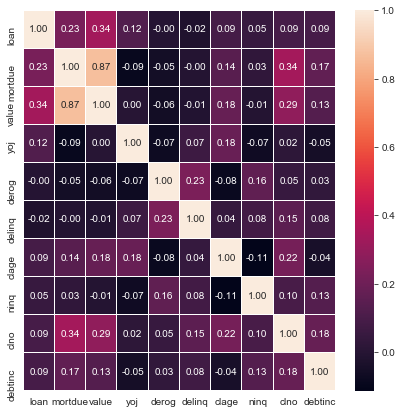

In [378]:
df2=df.copy()
df2 = df2.drop(columns=['bad' , 'job', 'reason'])    
fig,ax = plt.subplots(figsize=(7, 7))
sns.heatmap(df2.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f')
plt.show()
#Value and mortdue have strong postive realtionship
#value and loan have weak positive relationship.

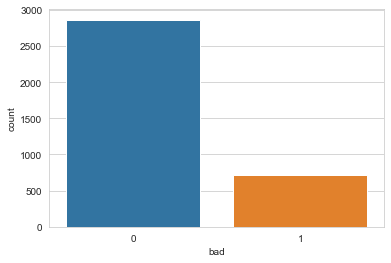

In [315]:
sns.countplot(df.bad)

In [323]:
pd.crosstab(index=df["reason"], columns=df["bad"])

#according to this; people's almost 1/4 did not pay back their credit.


bad,0,1
reason,,
DebtCon,1931,440
HomeImp,814,244


In [379]:
pd.crosstab(index=df["derog"], columns=df["bad"])

bad,0,1
derog,,
0.0,2254,452
1.0,162,103
2.0,49,49
3.0,10,25
4.0,4,10
5.0,4,4
6.0,4,6
7.0,0,7
8.0,0,3


In [342]:
from scipy import stats
import scipy.stats as stats
from scipy.stats import shapiro
import statsmodels.api as sm
import pylab
stats.describe(df.loan)



In [387]:
shapiro(df['loan'])

#this varibale are not normally distributed

(0.8493258953094482, 0.0)

In [345]:


import scipy as cipy 
stats.levene(df.mortdue,df.value)
#H0=equal variances
#HA= not equal variances

#p-value<0.05 we'll reject null hypothesis. Their variances are not equal.

LeveneResult(statistic=27.166309046206063, pvalue=1.960277648170479e-07)

In [344]:
#Examine  whether the strong relationship between value and mortdue are valid or not

from scipy.stats import pearsonr 
 
# Convert dataframe into series 
list1 = df['value'] 
list2 = df['mortdue'] 
# Apply the pearsonr() 
pearsonr(list1, list2) 

#The pearsons correlation coefficient can be used to evaluate relationship between more than two variables.
#We can see that two variables are positively correlated and the correaltion is 0.86

#H0: correlation =0
#HA: correlation is not equal to zero

#p-value(0.0)<0.05 therefor we reject null hyphothesis.

(0.8673681237221049, 0.0)